<a href="https://colab.research.google.com/github/kabirodavies/data-project/blob/main/Castify_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
-----

**
The goal of this analysis is to identify user behaviour on Castify's platforms and how to leverage this to improve user satisfaction and increase ad conversion rate


** 

------

# Sources

This is Castify's User Sessions and User Sessions Event data.

#Install Packages

# Imports

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=da29d4e5ee047ca375a63cf3759f8786384dec8be945ecd96d040d85b82462a6
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [31]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr
import matplotlib.ticker as ticker
from statsmodels.graphics.correlation import plot_corr

#Data Imbalance
from sklearn.utils import resample

#Encoding & Data Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

#Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Grid Search
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix


from google.colab import files
from datetime import datetime


# Data collection

***Data import***

In [39]:
data = files.upload()

Saving data.csv to data.csv


In [40]:
#Read Data
# user_session_events = pd.read_excel('user_session_events.xlsx')
# user_sessions = pd.read_excel('user_sessions.xlsx')
data = pd.read_csv('data.csv')

In [41]:
data.head()

,Unnamed: 0,session_id,datetime,supply_id,ip,user_device_id,app_name,app_bundle,app_ver,channel_id,...,video_title,page_id,playlist_id,category_id,revenue,cost,start_datetime,end_datetime,additional_data_1,language
0,0,1657777021124.48c7f281de5ab,2022-07-14 05:37:06.382000+00:00,NaN,197.237.180.26,a6d972d2-b895-a05e-798d-42f2f8481d00,Bob the train,1099280,5.8.4,780,...,bus song,0,NaN,NaN,0.0,0.0,2022-07-14 05:45:38.371000+00:00,2022-07-14 05:45:38.371000+00:00,NaN,en-KE
1,1,1657777021124.48c7f281de5ab,2022-07-14 05:37:06.382000+00:00,NaN,197.237.180.26,a6d972d2-b895-a05e-798d-42f2f8481d00,Bob the train,1099280,5.8.4,780,...,bus song,0,NaN,NaN,0.0,0.0,2022-07-14 05:53:43.743000+00:00,2022-07-14 05:53:43.743000+00:00,NaN,en-KE
2,2,1657777021124.48c7f281de5ab,2022-07-14 05:37:06.382000+00:00,NaN,197.237.180.26,a6d972d2-b895-a05e-798d-42f2f8481d00,Bob the train,1099280,5.8.4,780,...,bus song,0,NaN,NaN,0.0,0.0,2022-07-14 06:31:57.475000+00:00,2022-07-14 06:31:57.475000+00:00,NaN,en-KE
3,3,1657777021124.48c7f281de5ab,2022-07-14 05:37:06.382000+00:00,NaN,197.237.180.26,a6d972d2-b895-a05e-798d-42f2f8481d00,Bob the train,1099280,5.8.4,780,...,bus song,0,NaN,NaN,0.0,0.0,2022-07-14 05:53:30.845000+00:00,2022-07-14 05:53:30.845000+00:00,NaN,en-KE
4,4,1657777021124.48c7f281de5ab,2022-07-14 05:37:06.382000+00:00,NaN,197.237.180.26,a6d972d2-b895-a05e-798d-42f2f8481d00,Bob the train,1099280,5.8.4,780,...,bus song,0,NaN,NaN,0.0,0.0,2022-07-14 05:59:49.196000+00:00,2022-07-14 05:59:49.196000+00:00,NaN,en-KE


***Columns description***

In [42]:
print("Data Columns")
data.columns

Data Columns


Index(['Unnamed: 0', 'session_id', 'datetime', 'supply_id', 'ip',
       'user_device_id', 'app_name', 'app_bundle', 'app_ver', 'channel_id',
       'full_user_agent', 'os_name', 'os_family', 'country', 'city', 'isp',
       'carrier_id', 'connection_type', 'region', 'device_type', 'ua_family',
       'platform', 'player_type', 'admanager_type', 'additional_data',
       'default_language', 'id', 'session_id_1', 'datetime_1', 'event',
       'adserver', 'video_content_id', 'content_session_id', 'video_title',
       'page_id', 'playlist_id', 'category_id', 'revenue', 'cost',
       'start_datetime', 'end_datetime', 'additional_data_1', 'language'],
      dtype='object')

In [43]:
#Check the number of records
data.shape

(20000, 43)

# Data cleaning

***Check for null values***

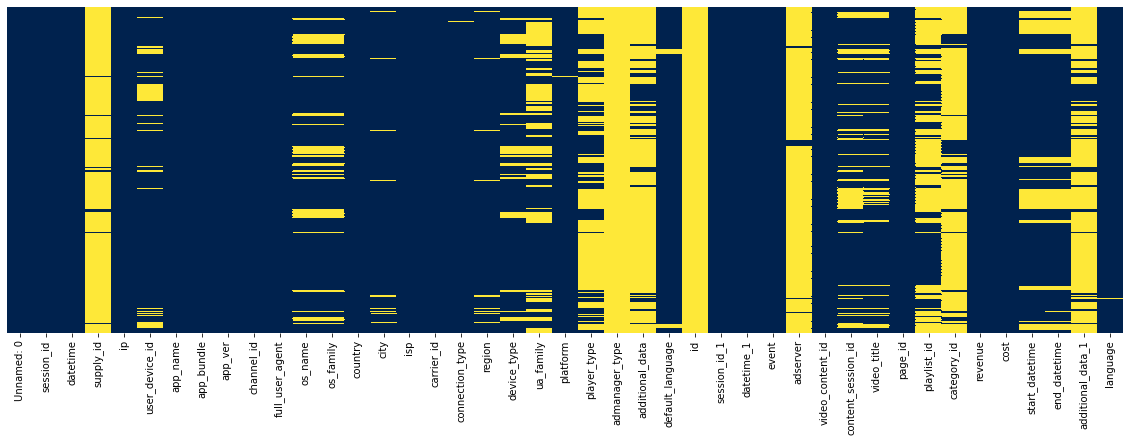

In [44]:
#Plot to show null values in user_session_events table
plt.figure(figsize=(20, 6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [45]:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")

In [46]:
missing_cols(data)

supply_id => 19124
user_device_id => 2613
app_name => 1
app_bundle => 2
channel_id => 1
os_name => 3662
os_family => 3662
city => 434
isp => 4
carrier_id => 4
connection_type => 56
region => 438
device_type => 2938
ua_family => 7968
platform => 50
player_type => 11789
admanager_type => 20000
additional_data => 15982
default_language => 564
id => 20000
adserver => 19466
content_session_id => 3842
video_title => 2430
playlist_id => 10811
category_id => 16757
start_datetime => 4021
end_datetime => 4043
additional_data_1 => 15784
language => 51


In [47]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))

In [48]:
perc_missing(data)

supply_id => 95.62%
user_device_id => 13.06%
app_name => 0.0%
app_bundle => 0.01%
channel_id => 0.0%
os_name => 18.31%
os_family => 18.31%
city => 2.17%
isp => 0.02%
carrier_id => 0.02%
connection_type => 0.28%
region => 2.19%
device_type => 14.69%
ua_family => 39.84%
platform => 0.25%
player_type => 58.94%
admanager_type => 100.0%
additional_data => 79.91%
default_language => 2.82%
id => 100.0%
adserver => 97.33%
content_session_id => 19.21%
video_title => 12.15%
playlist_id => 54.06%
category_id => 83.78%
start_datetime => 20.1%
end_datetime => 20.22%
additional_data_1 => 78.92%
language => 0.26%


In [49]:
#Droping Unwanted Columns
data.drop(['Unnamed: 0', 'additional_data_1', 'additional_data'], axis=1, inplace=True)

In [51]:
# Drop columns that are missing 10% of the data
df = data.copy() # Make a copy
df.dropna(axis=1, thresh = int(0.20*df.shape[0]), inplace=True)

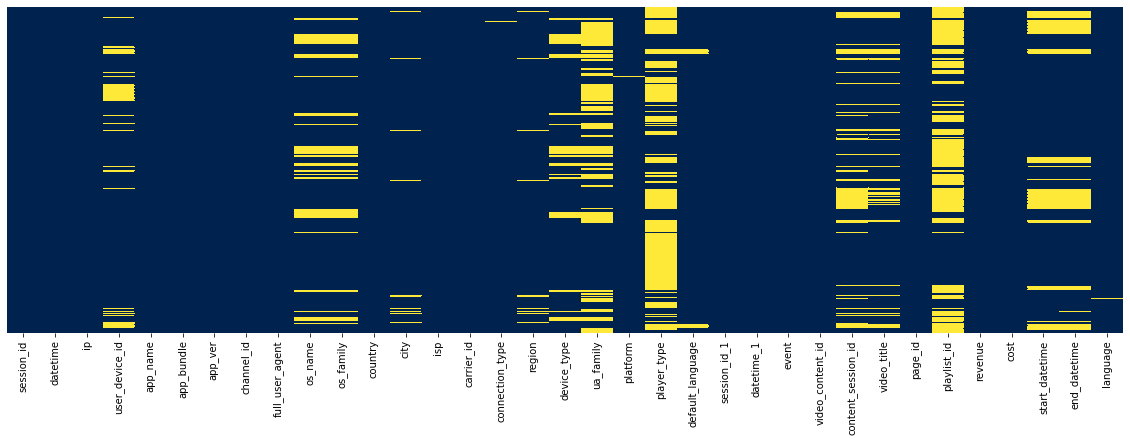

In [52]:
# Heatmap of the entire dataset
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cividis')


In [53]:
# Check for % of missing data per column 
perc_missing(df)

user_device_id => 13.06%
app_name => 0.0%
app_bundle => 0.01%
channel_id => 0.0%
os_name => 18.31%
os_family => 18.31%
city => 2.17%
isp => 0.02%
carrier_id => 0.02%
connection_type => 0.28%
region => 2.19%
device_type => 14.69%
ua_family => 39.84%
platform => 0.25%
player_type => 58.94%
default_language => 2.82%
content_session_id => 19.21%
video_title => 12.15%
playlist_id => 54.06%
start_datetime => 20.1%
end_datetime => 20.22%
language => 0.26%


Since majority of Items are categorical and highly related like city and country, it's impossible to impute all by mode as it will result to inconsistencies.

In [54]:
df.drop(['user_device_id', 'os_family', 'region', 'ua_family', 'player_type', 'playlist_id'], axis=1, inplace=True)

***Convert Columns Datatypes***

In [56]:
#Converting all date fields from objects to datetime
df['datetime'] = datetime.strptime(date_time,"%Y-%m-%dT%H:%M:%S%z")
df['start_datetime'] = datetime.strptime(date_time,"%Y-%m-%dT%H:%M:%S%z")
df['end_datetime'] = datetime.strptime(date_time,"%Y-%m-%dT%H:%M:%S%z")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype                    
---  ------              --------------  -----                    
 0   session_id          20000 non-null  object                   
 1   datetime            20000 non-null  datetime64[ns, UTC-07:00]
 2   ip                  20000 non-null  object                   
 3   app_name            20000 non-null  object                   
 4   app_bundle          20000 non-null  object                   
 5   app_ver             20000 non-null  object                   
 6   channel_id          20000 non-null  object                   
 7   full_user_agent     20000 non-null  object                   
 8   os_name             20000 non-null  object                   
 9   country             20000 non-null  object                   
 10  city                20000 non-null  object                   
 11  isp            

In [ ]:
df.shape

(20000, 35)

In [ ]:
#Check the % of missing values
perc_missing(df)

app_name => 0.0%
app_bundle => 0.01%
channel_id => 0.0%
os_name => 18.31%
city => 2.17%
isp => 0.02%
carrier_id => 0.02%
connection_type => 0.28%
device_type => 14.69%
platform => 0.25%
default_language => 2.82%
content_session_id => 19.21%
video_title => 12.15%
language => 0.26%


***Adding More Features***

In [59]:
#Checking time difference
df['diff'] = df['start_datetime'] - df['end_datetime']

***Imputing the null values***

***Taking advantage of sklearn SimpleImputer package to impute missing values with mode***

In [60]:
#Imputing the remaining missing values with mode
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['app_name', 'app_bundle', 'channel_id', 'os_name', 'city', 'isp', 'carrier_id', 'connection_type', 'device_type', 'platform', 'default_language','content_session_id', 'video_title', 'language']])
df[['app_name', 'app_bundle', 'channel_id', 'os_name', 'city', 'isp', 'carrier_id', 'connection_type', 'device_type', 'platform', 'default_language','content_session_id', 'video_title', 'language']] = imputer.transform(df[['app_name', 'app_bundle', 'channel_id', 'os_name', 'city', 'isp', 'carrier_id', 'connection_type', 'device_type', 'platform', 'default_language','content_session_id', 'video_title', 'language']])
perc_missing(df)

In [ ]:
df.isnull().sum()

session_id            0
datetime              0
ip                    0
app_name              0
app_bundle            0
app_ver               0
channel_id            0
full_user_agent       0
os_name               0
country               0
city                  0
isp                   0
carrier_id            0
connection_type       0
device_type           0
platform              0
default_language      0
session_id_1          0
datetime_1            0
event                 0
video_content_id      0
content_session_id    0
video_title           0
page_id               0
revenue               0
cost                  0
start_datetime        0
end_datetime          0
language              0
diff                  0
dtype: int64

In [ ]:
#Check the new shape of the data
df.shape

(20000, 30)

I believe this is ok, we can move forward with analysis and feature engineering.

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Copy of clean clean data file
df.to_csv("data_clean.csv")

The data cleaning is now performed, let's jump to the EDA!

# Exploratory Data Analysis (EDA)

In [28]:
#Read Clean csv
url = 'https://raw.githubusercontent.com/kabirodavies/data-project/main/data_clean.csv'
eda_df = pd.read_csv(url, index_col=[0])

In [29]:
eda_df.shape

(20000, 30)

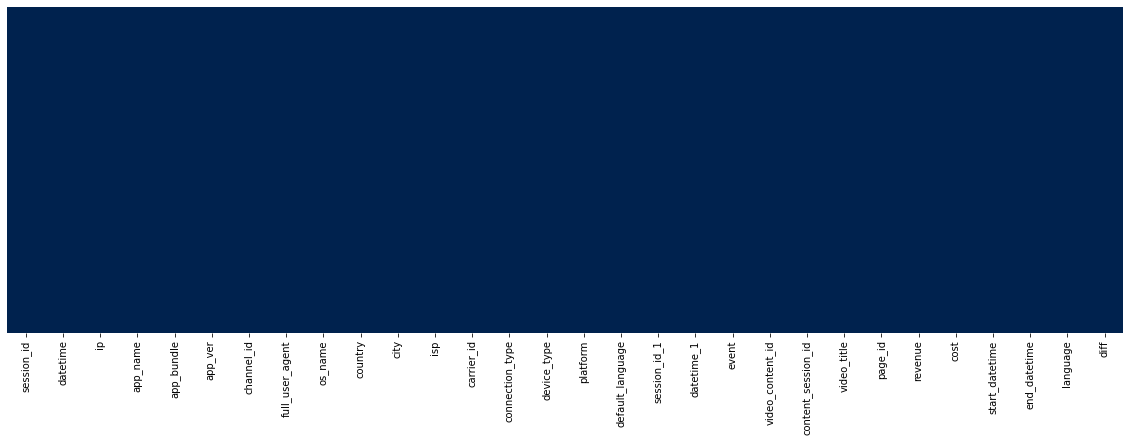

In [62]:
# Heatmap of clean dataset
plt.figure(figsize=(20, 6))
sns.heatmap(eda_df.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [63]:
eda_df.head(3)

,session_id,datetime,ip,app_name,app_bundle,app_ver,channel_id,full_user_agent,os_name,country,...,video_content_id,content_session_id,video_title,page_id,revenue,cost,start_datetime,end_datetime,language,diff
0,1657777021124.48c7f281de5ab,2022-07-07 10:30:00-07:00,197.237.180.26,Bob the train,1099280,5.8.4,780,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,KE,...,11390354,1657777896006,bus song,0,0.0,0.0,2022-07-07 10:30:00-07:00,2022-07-07 10:30:00-07:00,en-KE,0 days
1,1657777021124.48c7f281de5ab,2022-07-07 10:30:00-07:00,197.237.180.26,Bob the train,1099280,5.8.4,780,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,KE,...,11390354,1657777896006,bus song,0,0.0,0.0,2022-07-07 10:30:00-07:00,2022-07-07 10:30:00-07:00,en-KE,0 days
2,1657777021124.48c7f281de5ab,2022-07-07 10:30:00-07:00,197.237.180.26,Bob the train,1099280,5.8.4,780,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,KE,...,11390354,1657777896006,bus song,0,0.0,0.0,2022-07-07 10:30:00-07:00,2022-07-07 10:30:00-07:00,en-KE,0 days


***Let's have a look at the correlation between the numeric variables.***


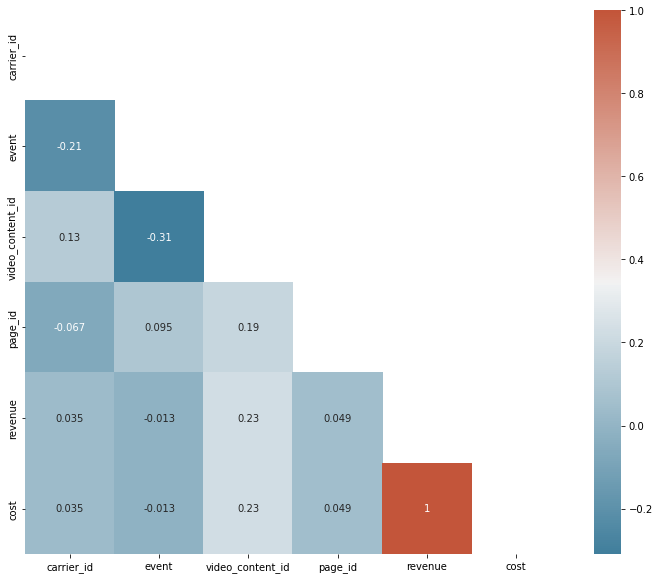

In [64]:
corr = eda_df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [34]:
# # Visualizing the correlation
# fig = plt.figure(figsize=(10,8));
# ax = fig.add_subplot(111);
# plot_corr(eda_df.corr(), xnames = eda_df.corr().columns, ax = ax, );

***Create a new column from events column for better visalization***

In [22]:
def create_event_value(eda_df):
  if eda_df['event'] == 24:
    return 'app_open'
  elif eda_df['event'] == 40:
    return 'page_navigation'
  elif eda_df['event'] == 23:
    return 'carousel_click'
  elif eda_df['event'] == 29:
    return 'start_video'
  elif eda_df['event']== 21:
    return 'video_play'
  elif eda_df['event'] == 22:
    return 'video_pause'
  elif eda_df['event'] == 31:
    return 'add_opportunity'
  elif eda_df['event'] == 26:
    return 'add_request'
  elif eda_df['event'] == 43:
    return 'ad_break_started'
  elif eda_df['event'] == 27:
    return 'ad_impression'
  elif eda_df['event'] == 28:
    return 'ad_complete'
  elif eda_df['event'] == 44:
    return 'ad_break_completed'
  elif eda_df['event'] == 33:
    return 'error_message'
  elif eda_df['event'] == 32:
    return 'video_end'
  elif eda_df['event'] == 30:
    return 'error'
  elif eda_df['event'] == 41:
    return '<keyword>'
  else:
    return 'exit_app'
  



In [23]:
eda_df['event_val'] = eda_df.apply(lambda eda_df: create_event_value(eda_df), axis=1)

In [24]:
eda_df['event_val'].head(40)

0         add_request
1         add_request
2         add_request
3         add_request
4         add_request
5         add_request
6         add_request
7         add_request
8         add_request
9         add_request
10        add_request
11        add_request
12        add_request
13        add_request
14        add_request
15        add_request
16        add_request
17        add_request
18        add_request
19        add_request
20        add_request
21        add_request
22    add_opportunity
23        add_request
24        add_request
25        add_request
26        add_request
27        add_request
28        add_request
29        add_request
30        add_request
31        add_request
32        add_request
33        add_request
34        add_request
35        add_request
36        add_request
37        add_request
38        add_request
39        add_request
Name: event_val, dtype: object

In [25]:
user_acivity = eda_df.groupby('event_val').size()
user_acivity

event_val
ad_break_completed       1
ad_break_started         2
ad_complete            341
ad_impression          347
add_opportunity       1341
add_request           9055
app_open               611
carousel_click         203
error                  493
error_message          136
exit_app               156
page_navigation         13
start_video           1184
video_end             1012
video_pause           2364
video_play            2741
dtype: int64

In [20]:
eda_df.head()

,session_id,datetime,ip,app_name,app_bundle,app_ver,channel_id,full_user_agent,os_name,country,...,video_content_id,content_session_id,video_title,page_id,revenue,cost,start_datetime,end_datetime,language,diff
0,1657777021124.48c7f281de5ab,2022-07-07 10:30:00-07:00,197.237.180.26,Bob the train,1099280,5.8.4,780,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,KE,...,11390354,1657777896006,bus song,0,0.0,0.0,2022-07-07 10:30:00-07:00,2022-07-07 10:30:00-07:00,en-KE,0 days
1,1657777021124.48c7f281de5ab,2022-07-07 10:30:00-07:00,197.237.180.26,Bob the train,1099280,5.8.4,780,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,KE,...,11390354,1657777896006,bus song,0,0.0,0.0,2022-07-07 10:30:00-07:00,2022-07-07 10:30:00-07:00,en-KE,0 days
2,1657777021124.48c7f281de5ab,2022-07-07 10:30:00-07:00,197.237.180.26,Bob the train,1099280,5.8.4,780,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,KE,...,11390354,1657777896006,bus song,0,0.0,0.0,2022-07-07 10:30:00-07:00,2022-07-07 10:30:00-07:00,en-KE,0 days
3,1657777021124.48c7f281de5ab,2022-07-07 10:30:00-07:00,197.237.180.26,Bob the train,1099280,5.8.4,780,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,KE,...,11390354,1657777896006,bus song,0,0.0,0.0,2022-07-07 10:30:00-07:00,2022-07-07 10:30:00-07:00,en-KE,0 days
4,1657777021124.48c7f281de5ab,2022-07-07 10:30:00-07:00,197.237.180.26,Bob the train,1099280,5.8.4,780,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,KE,...,11390354,1657777896006,bus song,0,0.0,0.0,2022-07-07 10:30:00-07:00,2022-07-07 10:30:00-07:00,en-KE,0 days


In [13]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20000 non-null  int64  
 1   session_id          20000 non-null  object 
 2   datetime            20000 non-null  object 
 3   ip                  20000 non-null  object 
 4   app_name            20000 non-null  object 
 5   app_bundle          20000 non-null  object 
 6   app_ver             20000 non-null  object 
 7   channel_id          20000 non-null  object 
 8   full_user_agent     20000 non-null  object 
 9   os_name             20000 non-null  object 
 10  country             20000 non-null  object 
 11  city                20000 non-null  object 
 12  isp                 20000 non-null  object 
 13  carrier_id          20000 non-null  float64
 14  connection_type     20000 non-null  object 
 15  device_type         20000 non-null  object 
 16  plat

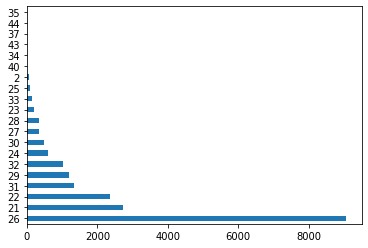

In [ ]:
# Distribution of user activity onn OTT platforms
eda_df['event'].value_counts().plot(kind='barh')

1. 28 - Ad Complete
2. 27 - Ad Impression
3. 30 - Error
4. 24 - App Opeb
5. 32 - End Video
6. 29 - Start Video
7. 31 - Ad Opportunity
8. 22 - Video Pause
9. 21 - Video Play
10. 26 - Ad request


The Huge difference in ad request and Ad complete needs to investigated further. Start and End Video are almost similar indicating that perhaps users tend to enjoy the video content.

Here are the questions I would like to answer in the analysis:
1. What is the OTT platform with the highest traffic?
2. What is the traffic distribution on OTT platforms and where is the traffic coming from (Country)?
3. Which are the best performing videos and do users skip ads on this videos?
4. How old are videos on OTT platforms and does age of video have any impact on ad impression?



```
# This is formatted as code
```

##### ***1. What is the OTT platform with the most traffic?***
----------

In [ ]:
eda_df['app_name'].value_counts()

Culture Forward TV                  3812
Aquarium TV                         2918
Getreel Fireplaces                  1347
Free Classic Movies                 1279
Helen Doron TV                      1234
ADULTish                            1185
Bob the train                        928
FashionTV+                           790
IndiMusic TV                         759
FashionTV+ / Fashion & Lifestyle     750
Coffee Jazz                          609
Kids TV                              603
The Kids Channel                     497
IndieBox                             365
Encourage TV (Binge)-AirTable        339
Tasty tv                             320
Kids Planet                          276
Relaxing Nature                      248
Fashion TV                           235
Baby Hazel Nursery Rhymes            172
WesternFlix                          166
The Live Train Channel               145
Marvel Comic Universe                142
Wawkalak TV                          101
Kids Tv Français

##### ***2. What is the traffic distribution on OTT platforms and where is the traffic coming from (Country)?***
----------

##### ***3. Which are the best performing videos and do users skip ads on this videos?***
----------

##### ***4. How old are videos on OTT platforms and does age of video have any impact on ad impression?***
----------

# Model building